In [1]:
# importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# importing the dataset

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [15]:
# we dont need to use encoding etc. because we are not going to use
# position column. we only use the level column to train our model
# for predicting the salaries

x = dataset.iloc[:,1:-1].values
x


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [16]:
y = dataset.iloc[:,-1].values

In [17]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [11]:

# also we will not split dataset into Test / Train because we have 
# very little data 

In [12]:
# we will create Linear Regression Model and Polynomial Lienar Regression Model
# comparing both

In [20]:
# firstly we create linear regression model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)



LinearRegression()

In [26]:
# now the polynomial regression model

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
print(poly_reg)
x_poly = poly_reg.fit_transform(x)
print(x_poly)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

PolynomialFeatures(degree=4)
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression()

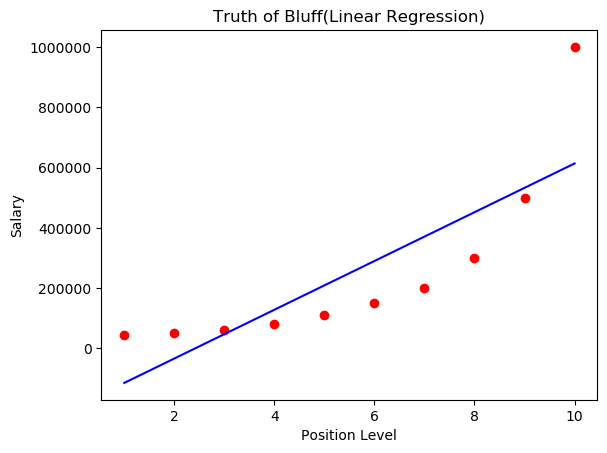

In [28]:
# visualising the linear regression

plt.scatter(x, y, color='red')
plt.plot(x, lin_reg.predict(x), color='blue')
plt.title('Truth of Bluff(Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


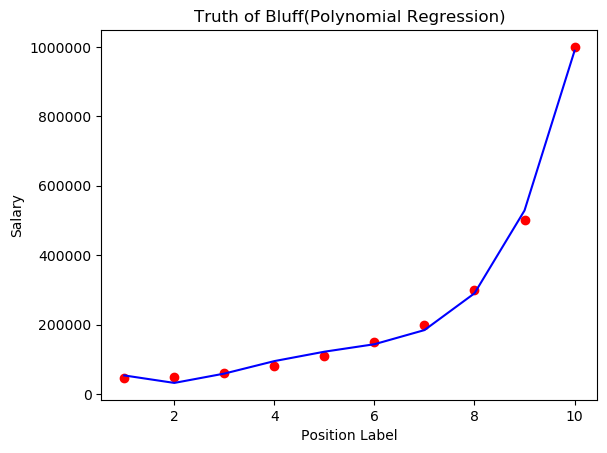

In [29]:
# visualing polynomial regression model

plt.scatter(x, y, color='red')
plt.plot(x, lin_reg_2.predict(x_poly), color='blue') # note we need to apply lin_reg_2 on poly_x and not on x
plt.title('Truth of Bluff(Polynomial Regression)')
plt.xlabel('Position Label')
plt.ylabel('Salary')
plt.show()

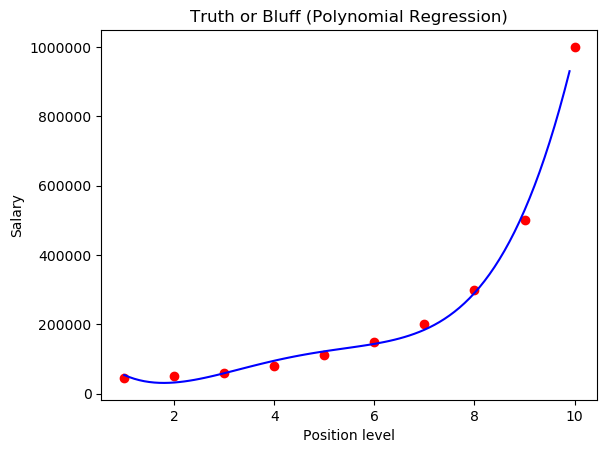

In [31]:
# smoothening the polynomial regression

X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# note that we have overfitting here !!

In [32]:
lin_reg.predict([[6.5]])


array([330378.78787879])

In [33]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265157])